# Preprocessing of Fatal Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fatal_df = pd.read_csv('fatal-police-shootings-data.csv')
fatal_df.describe()

,id,age
count,5189.000000,4955.000000
mean,2887.513972,37.057114
std,1625.446441,13.127268
min,3.000000,6.000000
25%,1486.000000,27.000000
50%,2891.000000,35.000000
75%,4301.000000,46.000000
max,5682.000000,91.000000


In [4]:
fatal_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015/1/2,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015/1/2,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015/1/3,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015/1/4,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015/1/4,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
fatal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 14 columns):
id                         5189 non-null int64
name                       5189 non-null object
date                       5189 non-null object
manner_of_death            5189 non-null object
armed                      4949 non-null object
age                        4955 non-null float64
gender                     5186 non-null object
race                       4554 non-null object
city                       5189 non-null object
state                      5189 non-null object
signs_of_mental_illness    5189 non-null bool
threat_level               5189 non-null object
flee                       4952 non-null object
body_camera                5189 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 496.7+ KB


In [6]:
fatal_df = fatal_df[['id','date']]
fatal_df['date'] = pd.to_datetime(fatal_df['date'])

df_15_19 = fatal_df[fatal_df['date']< pd.to_datetime('2020-01-01')] 
df_20 = fatal_df[fatal_df['date']>=pd.to_datetime('2020-01-01')]
train_set = df_15_19
test_set = df_20
print(len(df_15_19))




# plt.hist(train_set['date'],bins = 1826 ,align = 'left',rwidth = 1)
test_set

4938


,id,date
4938,5344,2020-01-01
4939,5347,2020-01-01
4940,5403,2020-01-01
4941,5342,2020-01-01
4942,5339,2020-01-02
4943,5348,2020-01-02
4944,5349,2020-01-02
4945,5350,2020-01-02
4946,5405,2020-01-02
4947,5340,2020-01-02


In [7]:
date_tot = 365*4 + 366
die_tot = len(train_set)
k = die_tot/date_tot
k


2.7042716319824756

# Section 2.2: Confidence Interval for 2015-2019

In [15]:
from scipy.stats import norm

set_1518 = fatal_df[fatal_df['date']<pd.to_datetime('2020-01-01')]
date_1518 = 4*365+366
k3 = len(set_1518)/date_1518
print(f'death number is:{len(set_1518)}in {date_1518};k3 is {k3}')

death_set = set_1518['date'].value_counts().value_counts()
die_non_1518 = date_1518-death_set.sum(axis = 0)
death_set['0'] = die_non_1518
# death_set
death_possibility_1518 = death_set.values/date_1518
dict_death_1518 = {'die_number':death_set.index,
                'number_of_days':death_set.values,
                'possibility':death_possibility_1518}
death_1518_table = pd.DataFrame(dict_death_1518)
death_1518_table['die_number'] = death_1518_table['die_number'].values.astype(int)
death_1518_table = death_1518_table.sort_values(by = 'die_number')

pred_possibility = [poisson_fun(k3,i) for i in range(10)]
pred_possibility[-1] = 1-sum(pred_possibility[:-1])
# sum(pred_possibility)
death_1518_table['pred_possibility'] = pred_possibility
# death_1518_table

std_k3 = math.sqrt(k3/date_1518)
# std_k3
alpha_CI = 0.05
z_halpha = norm.ppf(alpha_CI/2)
high_CI = k3-z_halpha*std_k3
low_CI = k3+z_halpha*std_k3
alpha_CI,z_halpha,z_halpha*std_k3,low_CI,high_CI

death number is:4938in 1826;k3 is 2.7042716319824756


(0.05,
 -1.9599639845400545,
 -0.07542630980976109,
 2.6288453221727144,
 2.7796979417922367)

# Section 4.3: Test of Poisson Distribution for 2020

In [16]:
#  print(pd.to_datetime('2020-04-19')-pd.to_datetime('2020-03-13'))
test_day_tot = 110

test_set = fatal_df[fatal_df['date']>=pd.to_datetime('2020-01-01')]
k2 = len(test_set)/test_day_tot
print(k2)
test_day_data = pd.value_counts(test_set['date'])
# test_day_data
test_die_num = test_day_data.value_counts()
test_die_non = test_day_tot - test_die_num.sum(axis = 0)
test_die_num['0'] = test_die_non
# test_die_num['7']=0
print(test_die_non)

test_die_possibility = test_die_num.values/test_day_tot
test_dict_die_num_table = {'die_number':test_die_num.index,
                'number_of_days':test_die_num.values,
                'possibility':test_die_possibility}
test_die_num_table = pd.DataFrame(test_dict_die_num_table)
test_die_num_table['die_number'] = test_die_num_table['die_number'].values.astype(int)
test_die_num_table = test_die_num_table.sort_values(by = 'die_number')

# row = {'die_number':6,
#       'number_of_days':8,
#       'possibility':8/test_day_tot}
test_die_num_table.drop([5,6],axis = 0,inplace =True)
test_die_num_table.loc[5] = [6,8,8/test_day_tot]
test_die_num_table

2.2818181818181817
25


,die_number,number_of_days,possibility
7,0.0,25.0,0.227273
0,1.0,21.0,0.190909
2,2.0,17.0,0.154545
1,3.0,19.0,0.172727
3,4.0,11.0,0.100000
4,5.0,9.0,0.081818
5,6.0,8.0,0.072727


In [17]:
pred_possibility = [poisson_fun(k2,i) for i in range(7)]
pred_possibility[-1] = 1-sum(pred_possibility[0:-1])

test_pred_possibility = pred_possibility


test_die_num_table['pred_possibility'] = test_pred_possibility
test_die_num_table['pred_num'] = test_day_tot*test_die_num_table['pred_possibility']
test_die_num_table

test_sq_error = ((test_die_num_table['number_of_days']-test_die_num_table['pred_num'])**2)/test_die_num_table['pred_num']
test_die_num_table['sq_error'] = test_sq_error

test_chi_error = sum(test_die_num_table['sq_error'])
test_freedom = 7-1-1
test_chi_error
# freedom


from scipy.stats import chi2
test_p = 1 - chi2.cdf(test_chi_error,test_freedom)
# print(test_p)

test_p,test_chi_error
# test_die_num_table

# print(test_day_tot)
# print(len(test_set))
# print(k3)

(4.595847457711244e-06, 32.56269807764731)

# Section 5.2: Goodness-of-fit Test for 2020-03-13 to 2020-04-19

In [16]:
#  print(pd.to_datetime('2020-04-19')-pd.to_datetime('2020-03-13'))
test_day_tot = 38

test_set = fatal_df[fatal_df['date']>=pd.to_datetime('2020-03-13')]
print(len(test_set))
k2 = len(test_set)/test_day_tot
print(k2)
test_day_data = pd.value_counts(test_set['date'])
# test_day_data
test_die_num = test_day_data.value_counts()
test_die_non = test_day_tot - test_die_num.sum(axis = 0)
test_die_num['0'] = test_die_non
# test_die_num['7']=0
print(test_die_non)

test_die_possibility = test_die_num.values/test_day_tot
test_dict_die_num_table = {'die_number':test_die_num.index,
                'number_of_days':test_die_num.values,
                'possibility':test_die_possibility}
test_die_num_table = pd.DataFrame(test_dict_die_num_table)
test_die_num_table['die_number'] = test_die_num_table['die_number'].values.astype(int)
test_die_num_table = test_die_num_table.sort_values(by = 'die_number')


test_die_num_table

46
1.2105263157894737
20


,die_number,number_of_days,possibility
6,0,20,0.526316
0,1,7,0.184211
2,2,3,0.078947
1,3,3,0.078947
4,4,2,0.052632
3,5,2,0.052632
5,6,1,0.026316


Text(0.5, 1.0, 'Expected Poisson Distribution')

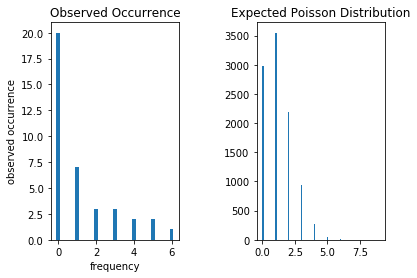

In [48]:

# plt.subplot?
fig,ax = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.6)
ax[0].bar(test_die_num_table['die_number'],test_die_num_table['number_of_days'],width = 0.2)

ax[0].set_xlabel('frequency')
ax[0].set_ylabel('observed occurrence')
# ax=plt.gca()
ax[0].set_title('Observed Occurrence')


import numpy as np
# rng = np.random.default_rng()
poi_sample = np.random.poisson(k2,10000)
ax[1].hist(poi_sample,bins = 100)
ax[1].set_title('Expected Poisson Distribution')

In [17]:
pred_possibility = [poisson_fun(k2,i) for i in range(7)]
pred_possibility[-1] = 1-sum(pred_possibility[0:-1])

test_pred_possibility = pred_possibility


test_die_num_table['pred_possibility'] = test_pred_possibility
test_die_num_table['pred_num'] = test_day_tot*test_die_num_table['pred_possibility']
test_die_num_table

test_sq_error = ((test_die_num_table['number_of_days']-test_die_num_table['pred_num'])**2)/test_die_num_table['pred_num']
test_die_num_table['sq_error'] = test_sq_error

test_chi_error = sum(test_die_num_table['sq_error'])
test_freedom = 7-1-1
test_chi_error


from scipy.stats import chi2
test_p = 1 - chi2.cdf(test_chi_error,test_freedom)

print(test_p,test_chi_error)
test_die_num_table



,die_number,number_of_days,possibility,pred_possibility,pred_num,sq_error
6,0,20,0.526316,0.298040,11.325534,6.643956
0,1,7,0.184211,0.360786,13.709857,3.283928
2,2,3,0.078947,0.218370,8.298071,3.382661
1,3,3,0.078947,0.088114,3.348345,0.036240
4,4,2,0.052632,0.026666,1.013315,0.960755
3,5,2,0.052632,0.006456,0.245329,12.549974
5,6,1,0.026316,0.001567,0.059549,14.852521


In [24]:
#  print(pd.to_datetime('2020-04-19')-pd.to_datetime('2020-03-13'))
test_day_tot = 38

test_set = fatal_df[fatal_df['date']>=pd.to_datetime('2020-03-13')]
print(len(test_set))
k2 = len(test_set)/test_day_tot
print(k2)
test_day_data = pd.value_counts(test_set['date'])
# test_day_data
test_die_num = test_day_data.value_counts()
test_die_non = test_day_tot - test_die_num.sum(axis = 0)
test_die_num['0'] = test_die_non
# test_die_num['7']=0
print(test_die_non)

test_die_possibility = test_die_num.values/test_day_tot
test_dict_die_num_table = {'die_number':test_die_num.index,
                'number_of_days':test_die_num.values,
                'possibility':test_die_possibility}
test_die_num_table = pd.DataFrame(test_dict_die_num_table)
test_die_num_table['die_number'] = test_die_num_table['die_number'].values.astype(int)
test_die_num_table = test_die_num_table.sort_values(by = 'die_number')

test_die_num_table.drop([5,3,4,1,2],axis = 0,inplace =True)
test_die_num_table.loc[4] = [2,11,11/test_day_tot]
test_die_num_table

46
1.2105263157894737
20


,die_number,number_of_days,possibility
6,0.0,20.0,0.526316
0,1.0,7.0,0.184211
4,2.0,11.0,0.289474
